# Forecasting a time series using Keras  


Example based on: 
  https://gist.github.com/susanli2016/12e067d3ebbacaff07fa31227e829176#file-lstm_data_preprocessing-py
and other links.


links to understand arquitecture of LSTM


> **1) Understanding LSTM Networks**  ✅

> https://colah.github.io/posts/2015-08-Understanding-LSTMs/



> **2) Understanding architecture of LSTM cell from scratch with code** ✅

> https://hackernoon.com/understanding-architecture-of-lstm-cell-from-scratch-with-code-8da40f0b71f4



> **3)Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras** ✅

> https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/



> **4)Keras_LSTM_Diagram**

> https://github.com/MohammadFneish7/Keras_LSTM_Diagram   ✅



> **5) How to Reshape Input Data for Long Short-Term Memory Networks in Keras**   ✅

> https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/


> **6) Illustrated Guide to LSTM’s and GRU’s: A step by step explanation**

> https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21




## Examples forecast 


The next example shows the modeling of the forecast problem for a time series, in this case toy time series in the form of a cosine function, straight line and a sum of cosines. The start point is a feedforward neural network to understand the role of the different components and compare with the arquitecture of the problem using LSTM. Later, two examples of the LSTM are shown to contrast two arquitectures of the problem and their meaning.


### Description of the problem:

The problem consists on training a network to receive a time series of dimension **look_back** as input and to obtain as output the forecast for the next data point.

Some previous definitions:


>  - A **"neuron"** in an artificial neural network is a mathematical approximation of a biological neuron. It takes a vector of inputs, performs a transformation on them, and outputs a single scalar value. 
    
>  - The **features** are the elements of your input vectors. The number of features is equal to the number of nodes in the input layer of the network.

>  - The **training set** is a set of examples used for learning, that is to fit the parameters [i.e., weights] of the classifier.

>  - The **batch size** is a number of samples processed before the model is updated.

>  - The number of **epochs** is the number of complete passes through the training dataset.




In [2]:
import numpy as np
from standard_plots import *

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

from keras.utils import plot_model
from ann_visualizer.visualize import ann_viz
from IPython.display import Image

Using TensorFlow backend.


In [5]:
t_end=1000
dataset = np.cos(np.arange(t_end)*(20*np.pi/1000))[:,None]
dataset.shape

(1000, 1)

In [6]:
#Some functions to use other datasets
t = np.arange(1000).reshape((1000,1))

print(t.shape)
def secular(t):
    d_secular = 0.0 + 0.5 * (t - t[0])
    return d_secular

def seasonal(t):
    d_seasonal = (1.0 * np.cos(2.0 * np.pi * (t/200-0.75))) + (2.5 * np.cos(2.0 * np.pi / 0.5 * (t/200-0.25)))
    return d_seasonal
#dataset = secular(t)
#dataset = seasonal(t)

(1000, 1)


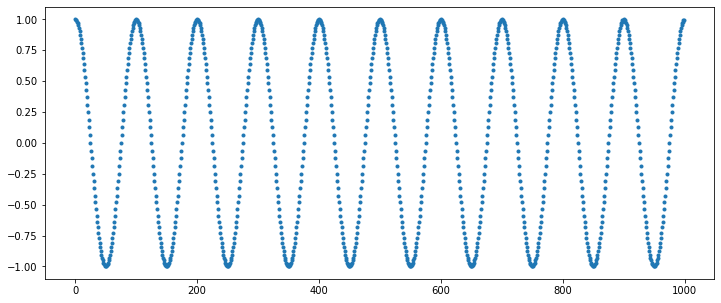

In [110]:
plt_plot(y = dataset)

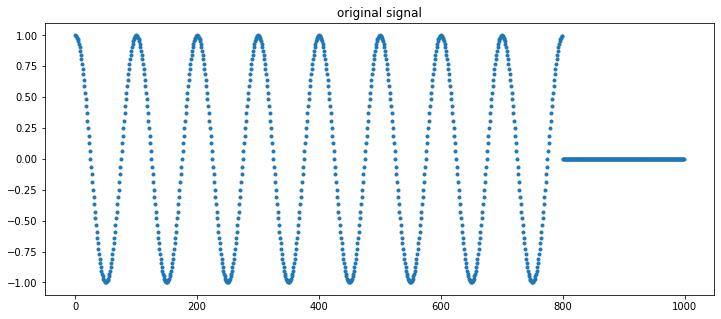

In [7]:
tt=800
dataset[tt:]=0
#plt_plot(y = dataset)
plt.figure(figsize=(12,5))
plt.plot(t,dataset,'.')
plt.title("original signal")
plt.show()

In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# Create training and testing set
look_back = 20
scaler = MinMaxScaler(feature_range=(0, 1))
dataset2 = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset),:]


## 1. Solving with a feedfordward neural network

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
 - 0s - loss: 0.7815
Epoch 2/200
 - 0s - loss: 0.0525
Epoch 3/200
 - 0s - loss: 0.0293
Epoch 4/200
 - 0s - loss: 0.0206
Epoch 5/200
 - 0s - loss: 0.0164
Epoch 6/200
 - 0s - loss: 0.0129
Epoch 7/200
 - 0s - loss: 0.0099
Epoch 8/200
 - 0s - loss: 0.0075
Epoch 9/200
 - 0s - loss: 0.0056
Epoch 10/200
 - 0s - loss: 0.0041
Epoch 11/200
 - 0s - loss: 0.0030
Epoch 12/200
 - 0s - loss: 0.0022
Epoch 13/200
 - 0s - loss: 0.0016
Epoch 14/200
 - 0s - loss: 0.0011
Epoch 15/200
 - 0s - loss: 7.5250e-04
Epoch 16/200


Epoch 200/200
 - 0s - loss: 8.5596e-15
CPU times: user 14.1 s, sys: 1.53 s, total: 15.6 s
Wall time: 9.08 s


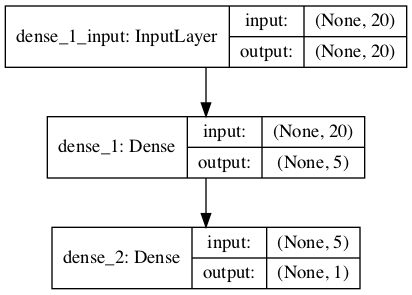

In [10]:
%%time
#theano.config.compute_test_value = "ignore"
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

batch_size = 20  #number of samples used to update the weights 
model = Sequential()

#Create a dense layer with Nneurons
Nneurons = 5
model.add(Dense(Nneurons, input_dim=look_back))

#Create the output layer with 1 output
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
plot_model(model, to_file='modelSimple.png', show_shapes = True)
ann_viz(model, title='model')

model.fit(trainX, trainY, epochs=200, batch_size=batch_size, verbose=2)

Image(filename='modelSimple.png') 

We can check the parameters of the problem saved in model.weights

In [207]:
a = model.weights
print(len(a))
print('weights first layer, size: ', model.weights[0].shape)
print('biases first layer, size: ', model.weights[1].shape)
print('weights output layer, size: ', model.weights[2].shape)
print('bias output layer, size: ', model.weights[3].shape)

4
weights first layer, size:  (20, 5)
biases first layer, size:  (5,)
weights output layer, size:  (5, 1)
bias output layer, size:  (1,)


**A parenthesis on backpropagation**

The aim of the neural network is to find the parameters (weights) that minimize the cost function:

$$ C_0 = \sum_{i=1}^{Nsamples} ||\bf a^{i (L)} - \bf y^i||^2  $$

Where $\bf a^{i (L)}$ is a vector with activations associated to the output layer, in this case with index L,  for the sample i, while $\bf y^i$ is the vector of observations for the sample i.

The weights of the problem are found by minimizing $C_0$ (idealy with all the training set, but we will see next that is not neccessarily the more efficient way). 

The algorithm used to do that is the **gradient descent** which consists in getting close gradually to the Cost function minimum by making steps in the direction of -gradient, which in any point has locally the direction of maximum descent. The weights values are updated as 

$$ \bf W^i_{t+1} = \bf W^i_{t} - \alpha \nabla W^i_{t}  $$

So the aim at each step is to update the weights and biases, so the gradient needs to be calculated.


If we calculate the gradient respect to the weights in the output layer:





If we define for a certain layer l the following quantities:

$$\bf z^{(l)} = \bf W ^ {(l)} a ^ {(l-1)}  +  \bf b^ {(l)}$$

$$ \bf a ^ {(l)} = \sigma (\bf z^l)$$


If we calculate the gradient respect to the weights in the output layer following the chain rule:
$$ \frac {\partial C_0}{\partial w_{jm}
^{(L)}} = \frac {\partial z_p^{(L)} }{\partial w_{jm} ^ {(L)}} \frac {\partial a_k^{(L)} }{\partial z_p ^ {(L)}} \frac {\partial C_0 }{\partial a_k ^{(L)}} $$  (repeated index represents a summation)

Where 

  $$ \frac {\partial a_k^{(L)} }{\partial z_p ^ {(L)}} \frac {\partial C_0 }{\partial a_k ^{(L)}}= 2(a_k^{(L)}-y_k) \sigma '( z_k ^ {(L)})= \delta_k^{(L)}$$


Is a common term in all the gradient terms, and will be denoted as $\delta_k^{(L)}$. Vectorial form of this equation is:


$$ \bf \delta ^ L = (\bf{a}^{(L)} - \bf y) \odot \sigma'(\bf z^L) $$

Where $\odot$ is the product component by component (Hadamard product).

Now we can calculate the gradient respect to the weights in the layer L-1 

$$ \bf \delta ^ {L-1} = (\bf w^L )^ T  \bf \delta ^ L  \odot \sigma'(\bf z^L) $$

Where the term $\bf \delta ^ {L-1}$ depends on $\bf \delta ^ L $ and so on.
This recurrence continue layer by layer, so we can think of it as a cummulative process, as we go further from the output layer. 

The case for the gradient respect to the biases is analogous, and even simpler, because $\frac {\partial z_j^{(L)} }{\partial b_{j} ^ {(L)}}=1 $

So the backpropagation calculates first the gradient associated with the weights and biases in the output layer and then sequencially calculates the gradient associated with each layer backwards. 

The summary for backpropagation is shown here:


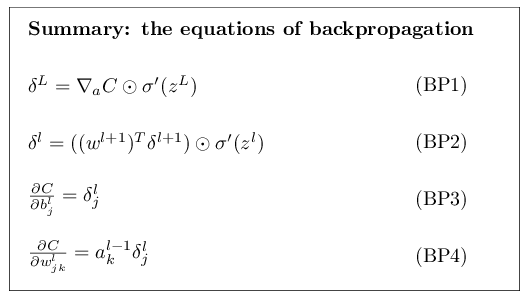

A usual problem known as the **vanishing gradient problem** appears when the cummulative values are close to zero making a tendency for the learning rate to decrease as we go farther from the output layer. The explanation has to do with the $\sigma'(\bf z ^ l)$ term associated with each layer, which acummulates in the gradient product when we calculate the gradient for succesive layers (in the backward direction). 

The $\sigma'(\bf z ^ l)$ term is shown in the next figure:


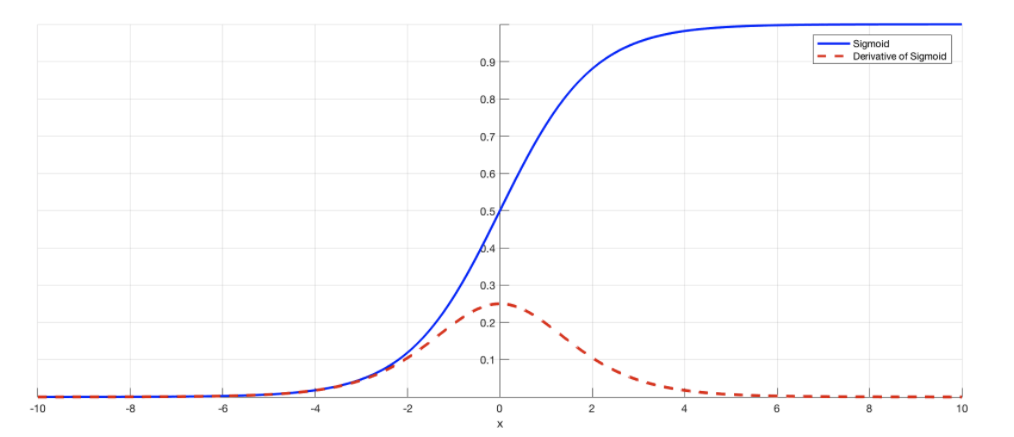



When the function argument is far from zero 

#### Notes in backpropagation 
Some links:
> - **How the backpropagation algorithm works**

> > http://neuralnetworksanddeeplearning.com/chap2.html

> - **The Vanishing Gradient Problem**

> > https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484


(480, 1)
(1000, 1)


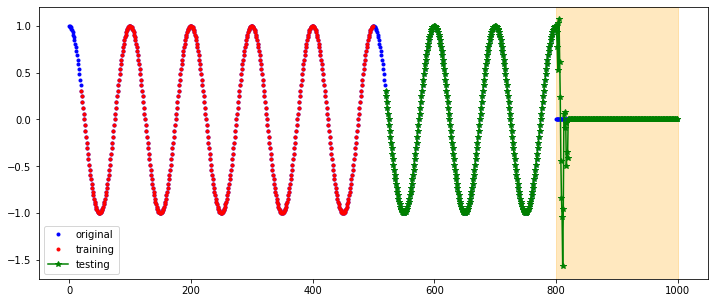

In [11]:
#Plot results

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
testPredict = model.predict(testX, batch_size=batch_size)

#plot figure
plt.figure(figsize=(12,5))



# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
print(trainPredict.shape)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
print(trainPredictPlot.shape)


# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict

# plot predictions
plt.plot(t,dataset,'.b', label='original')
plt.plot(scaler.inverse_transform(trainPredictPlot),'.r', label='training')
plt.plot(scaler.inverse_transform(testPredictPlot), '-*g', label='testing')
plt.axvspan(tt, t_end, color='orange', alpha=0.25)
plt.legend()
plt.show()


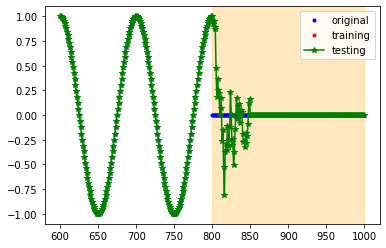

In [182]:
# plot predictions
plt.figure()
plt.plot(t[600:],dataset[600:],'.b', label='original')
plt.plot(t[600:],scaler.inverse_transform(trainPredictPlot[600:]),'.r', label='training')
plt.plot(t[600:],scaler.inverse_transform(testPredictPlot[600:]), '-*g', label='testing')
plt.axvspan(tt, t_end, color='orange', alpha=0.25)
plt.legend()
plt.show()

## 2. Solving the forecast with an LSTM

#### About the structure of the LSTM

The basic structure of an LSTM is composed by gates (each gate can be considered as a neuron in the sense that receive an input and calculates an activation, then the LSTM could be considered as a super neuron). An LSTM unit scheme is shown in the next figure:

[LSTMfig.png](attachment:LSTMfig.png)
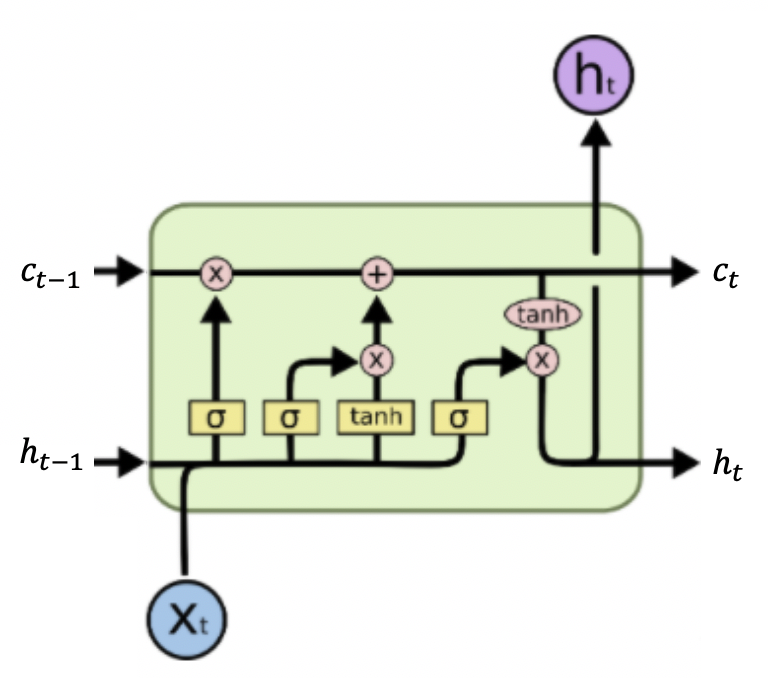


The parameters in this neural network are matrices $\bf U, \bf W$, and the vector $\bf b$. Each gate has its own set of these matrices.

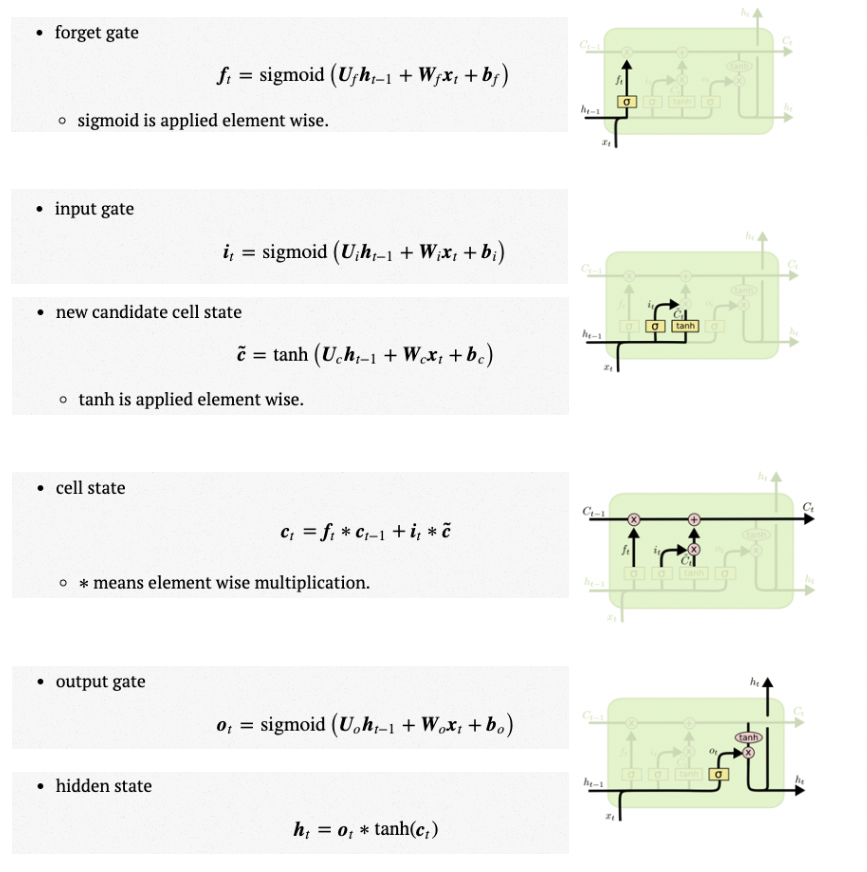


> - **Extract weights from Keras's LSTM and calcualte hidden and cell states**

> https://fairyonice.github.io/Extract-weights-from-Keras's-LSTM-and-calcualte-hidden-and-cell-states.html

### * Time series forecast with an LSTM




The input to every LSTM layer must be three-dimensional.
The three dimensions of this input are (nsamples, ntimesteps, feautures) :

**Samples:** One sequence is one sample. A batch is comprised of one or more samples.

**Time Steps:** One time step is one point of observation in the sample**.

**Features:** One feature is one observation at a time step.





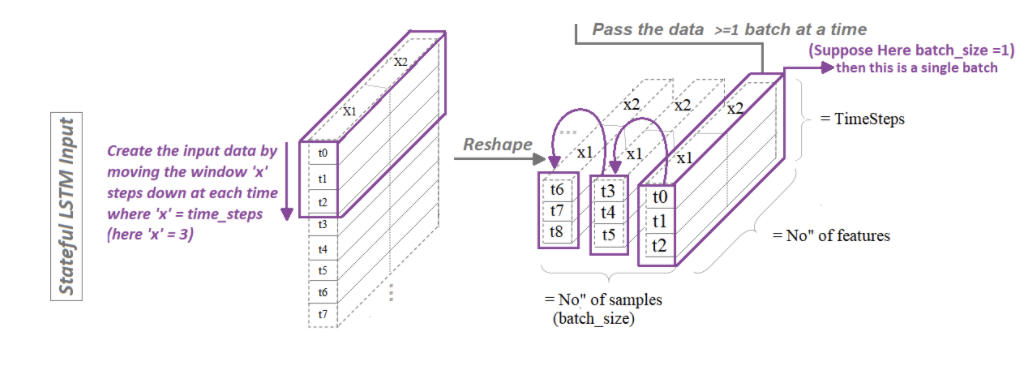

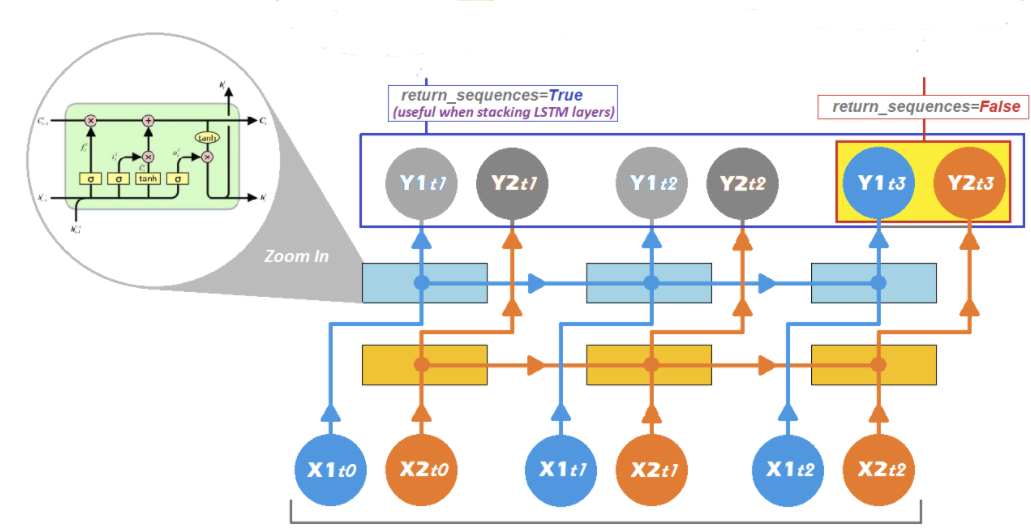


*   diagrams in link 1)

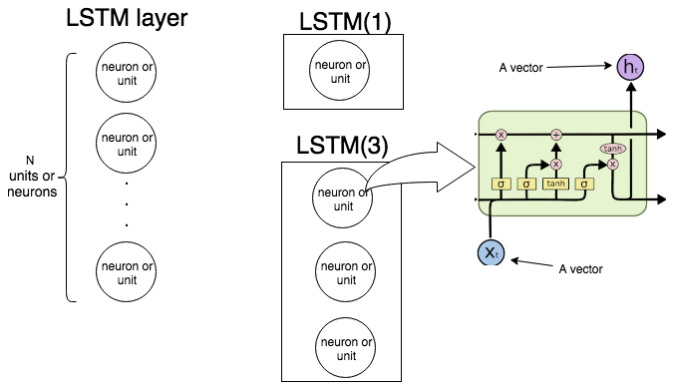


The number of units is the number of LSTM blocks 

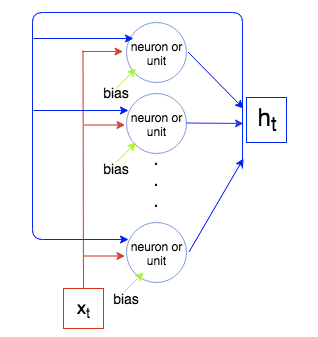
Notice in the above figure that the hidden stated is shared between the LSTM blocks.

The last diagram can be found in:
https://stats.stackexchange.com/questions/365428/difference-between-a-single-unit-lstm-and-3-unit-lstm-neural-network








### 2.1 input_shape=(look_back,1) (one dimensional input with 20 timesteps)

In [22]:
#%%time
#theano.config.compute_test_value = "ignore"
look_back=80
trainX, trainY = create_dataset(train, look_back)
#trainX is an array  [dataset[0:20], dataset[1:21], dataset[2:21]...]  680 samples
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


# create and fit the LSTM network
batch_size = 20
model = Sequential()
units=5
LSTMobject=LSTM(units,input_shape = (look_back,1))
model.add(LSTMobject)

#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(trainX, trainY, epochs=10, batch_size=batch_size, verbose=0)
#running with epochs=100 takes some minutes, but it is more stable than the case with a lower number of epochs

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [23]:
print(model)
print(model.layers)
layerLSTM=model.layers[0]

W, U, b = layerLSTM.get_weights()
print(' W.shape, U.shape, b.shape : ', W.shape, U.shape, b.shape)

[<keras.layers.recurrent.LSTM object at 0x1a439fbf90>, <keras.layers.core.Dense object at 0x1a452b9610>]
 W.shape, U.shape, b.shape :  (1, 20) (5, 20) (20,)


500
(420,)
(420,)
(420,)
(420, 1)


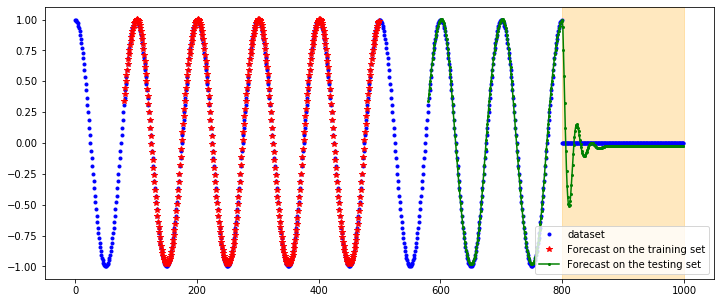

In [20]:
#Plotting the results
yhat = model.predict(trainX)

t_train = np.arange(0+look_back, train_size) 
t_test = np.arange(train_size + look_back, len(dataset))

#plot figure
plt.figure(figsize=(12,5))

yhat = model.predict(trainX)

plt.plot(t, dataset,'.b', label='dataset')
plt.plot(t_train,scaler.inverse_transform(yhat),'*r', label='Forecast on the training set')

#plt.plot(scaler.inverse_transform(trainPredictPlot),'.r', label='training')
#plt.plot(scaler.inverse_transform(testPredictPlot), '*g', label='testing')

#And look at the quality of the prediction
print(test_size)
print(testY.shape)
print(testY.shape)
print(t_test.shape)

yhat = model.predict(testX)
#plt.plot(t_test, testY, '.', label='Testing set', alpha=0.75)
plt.plot(t_test,scaler.inverse_transform(yhat), '-og', label='Forecast on the testing set', ms=2)
plt.axvspan(tt, t_end, color='orange', alpha=0.25)
plt.legend()
print(yhat.shape)


### 2.2 input_shape=(1, look_back) (input has 20 features and the timestep is 1)

In [ ]:
%%time
#theano.config.compute_test_value = "ignore"
# create and fit the LSTM network

trainX, trainY = create_dataset(train, look_back)
#trainX is an array  [dataset[0:20], dataset[1:21], dataset[2:21]...]  680 samples
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


batch_size = 4
model = Sequential()
units=6
model.add(LSTM(units,input_shape=(1, look_back)))

#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(trainX, trainY, epochs=50, batch_size=batch_size, verbose=2)

In [ ]:
print(model.layers)
layerLSTM=model.layers[0]

W, U, b = layerLSTM.get_weights()
print(' W.shape, U.shape, b.shape : ', W.shape, U.shape, b.shape)


In [ ]:
#Plotting the results
yhat = model.predict(trainX)

t_train = np.arange(0+look_back, train_size) 
t_test = np.arange(train_size + look_back, len(dataset))

#plot figure
plt.figure(figsize=(12,5))

yhat = model.predict(trainX)

plt.plot(t_train, trainY,'b', label='dataset')
plt.plot(t_train, yhat,'*g', label='Forecast on the training set')

#plt.plot(scaler.inverse_transform(trainPredictPlot),'.r', label='training')
#plt.plot(scaler.inverse_transform(testPredictPlot), '*g', label='testing')

#And look at the quality of the prediction
print(test_size)
print(testY.shape)
print(testY.shape)
print(t_test.shape)

yhat = model.predict(testX)
plt.plot(t_test, testY, '.', label='Testing set', alpha=0.75)
plt.plot(t_test, yhat, '-o', label='Forecast on the testing set', ms=2)

# Code to replicate an LSTM layer 
https://fairyonice.github.io/Extract-weights-from-Keras's-LSTM-and-calcualte-hidden-and-cell-states.html



In [ ]:
# Code for the operations on a LSTM layer 


#code for a layer 

def sigmoid(x):
    return(1.0/(1.0+np.exp(-x)))

def LSTMlayer(weight,x_t,h_tm1,c_tm1):
    '''
    c_tm1 has the lenght of the units
    h_tm1 has the lenght of the units
    x_t   is the input at each timestep
    
    W.shape = (nfeature,hunits*4)
    U.shape = (hunits,hunits*4)
    b.shape = (hunits*4,)
    '''
    W, U, b = weight
    s_t = (x_t.dot(W) + h_tm1.dot(U) + b)
    hunit = U.shape[0]
    i  = sigmoid(s_t[:,:hunit])
    f  = sigmoid(s_t[:,1*hunit:2*hunit])
    _c = np.tanh(s_t[:,2*hunit:3*hunit])
    o  = sigmoid(s_t[:,3*hunit:])
    c_t = i*_c + f*c_tm1
    h_t = o*np.tanh(c_t)
    return(h_t,c_t)

In [ ]:
#%%time
#theano.config.compute_test_value = "ignore"

trainX, trainY = create_dataset(train, look_back)
#trainX is an array  [dataset[0:20], dataset[1:21], dataset[2:21]...]  680 samples
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


# create and fit the LSTM network
batch_size = 1
model = Sequential()
units=6
LSTMobject=LSTM(units,input_shape = (look_back,1))
model.add(LSTMobject)


model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(trainX, trainY, epochs=10, batch_size=batch_size, verbose=0)
#running with epochs=100 takes some minutes, but it is more stable than the case with a lower number of epochs

In [ ]:
print(model)
print(model.layers)
layerLSTM=model.layers[0]

weight = layerLSTM.get_weights()
W, U, b = weights
print(' W.shape, U.shape, b.shape : ', W.shape, U.shape, b.shape)

In [ ]:
X=trainX[0]
print(len(trainX))

pred_train=np.zeros(len(trainX))

for j in range(len(trainX)):
    c_tm1 = np.array([0]*units).reshape(1,units)
    h_tm1 = np.array([0]*units).reshape(1,units)

    X=trainX[j]
    for i in range(20):
        x_t=X[i]
        (h_t,c_t) = LSTMlayer(weight,x_t,h_tm1,c_tm1)
   
        h_tm1=h_t
        c_tm1=c_t
    
    #print('h_t: ', h_t.shape)
    #output layer
    output_layer=model.layers[1]
    #print(output_layer)
    weight_o = output_layer.get_weights()
    Wo, bo = weight_o
    #print(weight_o)
    #print(' W.shape, b.shape : ', Wo.shape, bo.shape)
    output = h_t.dot(Wo) + bo #should be the argument of a sigmoid, but it does not replicate the result in that way
    #print('output', output)
    pred_train[j]=output
    
    
pred_test=np.zeros(len(testX))  
for j in range(len(testX)):
    c_tm1 = np.array([0]*units).reshape(1,units)
    h_tm1 = np.array([0]*units).reshape(1,units)

    X=testX[j]
    for i in range(20):
        x_t=X[i]
        (h_t,c_t) = LSTMlayer(weight,x_t,h_tm1,c_tm1)
   
        h_tm1=h_t
        c_tm1=c_t
    
    #print('h_t: ', h_t.shape)
    #output layer
    output_layer=model.layers[1]
    #print(output_layer)
    weight_o = output_layer.get_weights()
    Wo, bo = weight_o
    #print(weight_o)
    #print(' W.shape, b.shape : ', Wo.shape, bo.shape)
    output = h_t.dot(Wo) + bo #should be the argument of a sigmoid, but it does not replicate the result in that way
    #print('output', output)
    pred_test[j]=output

In [ ]:
#Plotting the results
yhat = model.predict(trainX)

t_train = np.arange(0+look_back, train_size) 
t_test = np.arange(train_size + look_back, len(dataset))

#plot figure
plt.figure(figsize=(12,5))

yhat = model.predict(trainX)

plt.plot(t_train, trainY,'b', label='dataset')
plt.plot(t_train, yhat,'*g', label='Forecast keras')
plt.plot(t_train, pred_train,'*r', label='Predictions replicated')

#plt.plot(scaler.inverse_transform(trainPredictPlot),'.r', label='training')
#plt.plot(scaler.inverse_transform(testPredictPlot), '*g', label='testing')

#And look at the quality of the prediction
print(test_size)
print(testY.shape)
print(testY.shape)
print(t_test.shape)

yhat = model.predict(testX)
plt.plot(t_test, testY, '.', label='Testing set', alpha=0.75)
plt.plot(t_test, yhat, '-o', label='Forecast on the testing set', ms=2)
plt.plot(t_test, pred_test,'*g', label='Predictions replicated')

In [ ]:
#dir(model)
